<img src="Images/slide1_pandas.png" width="600" height="600">

<img src="Images/slide2_pandas.png" width="600" height="600">

## Learning Objectives

- Learn all of the methods in pandas for data-frame manipulation
- Apply visualization to data-frame

### Lets make a Pandas dataframe from a video game sales csv file 

You can download the CSV from [the repo](https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Datasets/vgsales.csv) under Notebooks --> Datasets --> vgsales.csv

In [2]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('Datasets/vgsales.csv')

### Lets look at the first 5 rows of the dataframe

In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## .shape

shape is a property of a dataframe that will give us a tuple containing the number of rows and the number of columns


In [7]:
df.shape

(16598, 11)

### Video Game Sales Dataset Description

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

### Plot a histogram of the game platform

## Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

## Histograms

A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges or if your data is categorical it will store counts of each category. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

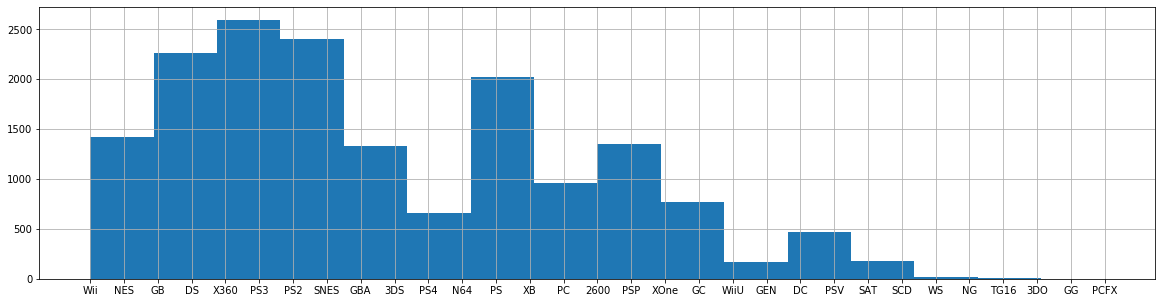

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

df['Platform'].hist(bins=16)
#plt.show()

### How many of the Platform values are empty (or null)?

In [12]:
# how many of Age values are null
df['Platform'].isna().sum()

0

### Create a new column as NA_Sales_Percent which will be the percentage of the global sales for NA sales

In [20]:
# create a new column as NA_Sales_Percent
# we can directly apply mathematical operations to column info
df['NA_Sales_Percent '] = df['NA_Sales'] / df['Global_Sales']

In [21]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Percent
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260


### We have one more column (check it)

In [18]:
df.shape

(16598, 12)

## Box and Whisker Plots

These types of plots will show us a nice summary of the data. Here's a [good intro](https://plotly.com/chart-studio-help/what-is-a-box-plot/) on how to read a box plot

### Show the majority of Age range

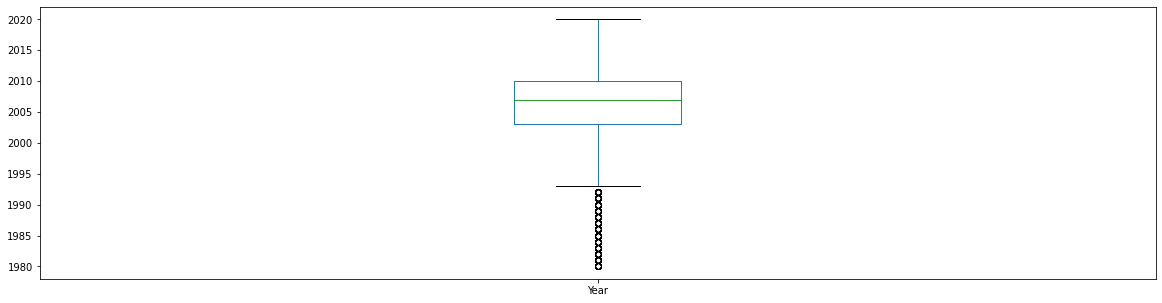

In [144]:
#df['Year'].hist(bins=16)
df['Year'].plot.box()

### List all of the Years that are not null

In [148]:
df['Year'].dropna().values

array([2006., 1985., 2008., ..., 2008., 2010., 2003.])

### Slice the dataframe for the games that were realeased in 1985

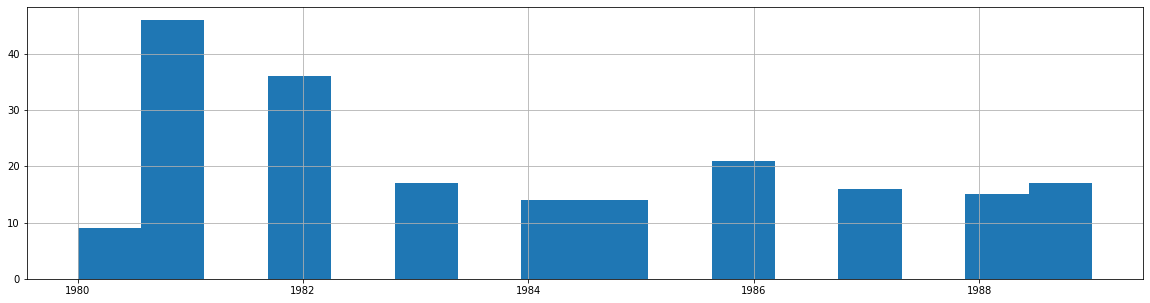

In [157]:
df[df['Year'] < 1990]['Year'].hist(bins=16)

### Plot the Platform range for the games that were realeased in 1985

### Describe a specific column 

In [159]:
df['Genre'].describe()

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

### How many unique values does the 'Genre' have?

In [43]:
df['Genre'].nunique()

12

### Count the different 'Genre' values the dataframe has

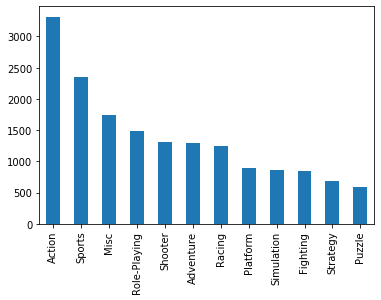

In [163]:
df['Genre'].value_counts()

df['Genre'].value_counts().plot(kind='bar')

### Count the different 'Genre' values the dataframe has and plot horizontaly

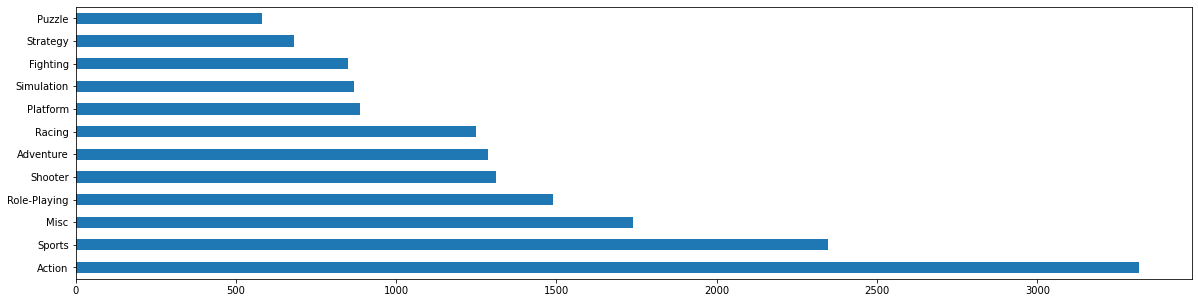

In [164]:
df['Genre'].value_counts().plot(kind='barh')

### Another way to do the count and plot it

Seaborn is a Python library created for enhanced data visualization. It makes some aspects of creating plots easier than using something like matplot lib. 

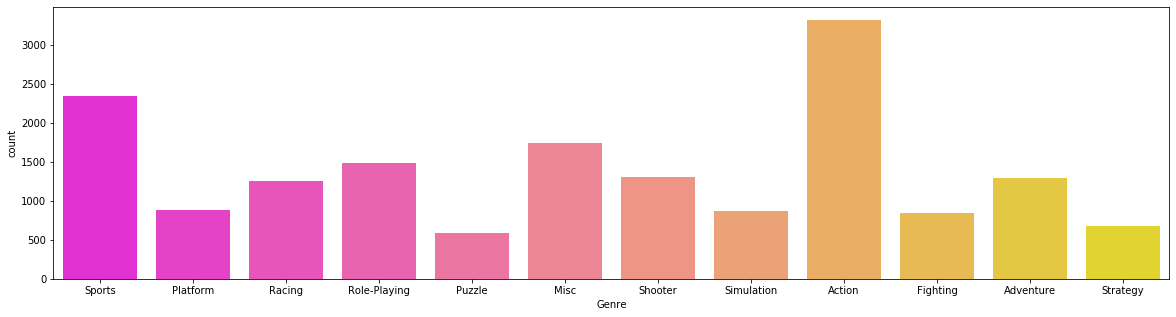

In [167]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 5]

# Bar Chart Example #1 (Simple): Categorical Variables Showing Counts
sns.countplot(x="Genre", palette="spring", data=df)


In [51]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [52]:
df['Genre'].value_counts().to_json()

'{"Action":3316,"Sports":2346,"Misc":1739,"Role-Playing":1488,"Shooter":1310,"Adventure":1286,"Racing":1249,"Platform":886,"Simulation":867,"Fighting":848,"Strategy":681,"Puzzle":582}'

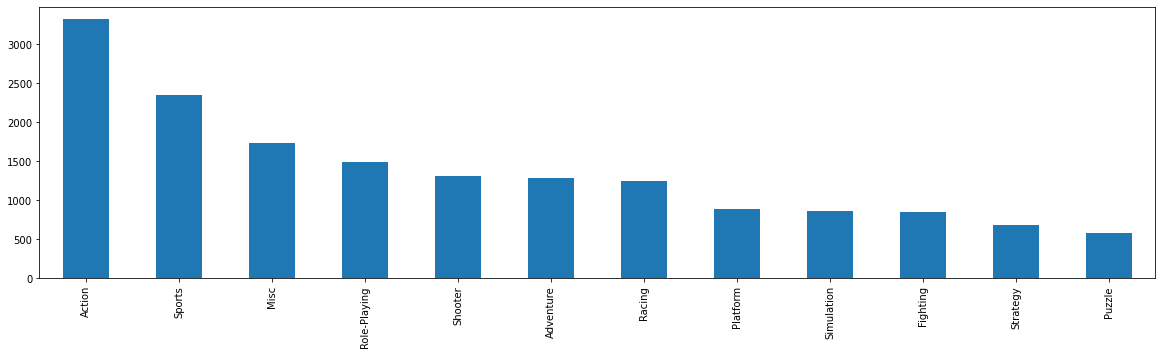

In [53]:
df['Genre'].value_counts().plot(kind='bar')

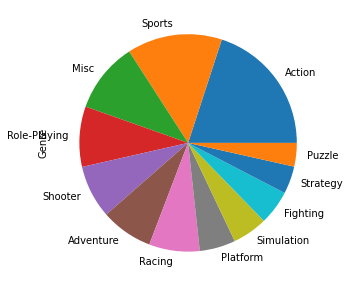

In [54]:
df['Genre'].value_counts().plot(kind='pie')

### Plot sales in NA based for Nintendo based on Genre

Groupby is used to split data into groups based on some cirteria, basically we provide a mapping of labels to group names.

.groupby()'s by argument is used to determine the groups for the groupby. If by is a function, it’s called on each value of the object’s index. If a dict or Series is passed, the Series or dict VALUES will be used to determine the groups (the Series’ values are first aligned; see .align() method). If an ndarray is passed, the values are used as-is determine the groups. A label or list of labels may be passed to group by the columns in self. Notice that a tuple is interpreted as a (single) key.

In [170]:
df[df['Publisher'] == 'Nintendo'].groupby('Genre')

for i in df[df['Publisher'] == 'Nintendo'].groupby('Genre')['NA_Sales']:
    print(i)
    

('Action', 45       4.40
94       4.10
100      3.83
127      3.74
186      1.90
         ... 
12426    0.04
13887    0.00
14301    0.02
16123    0.00
16269    0.00
Name: NA_Sales, Length: 79, dtype: float64)
('Adventure', 50       6.16
251      2.19
728      1.00
919      0.96
923      0.87
987      0.85
1535     0.76
1682     0.55
1890     0.44
2261     0.16
2333     0.46
2474     0.60
2937     0.37
3495     0.10
3576     0.27
4477     0.34
4492     0.26
4653     0.18
4921     0.19
4935     0.23
5050     0.24
5947     0.15
7037     0.00
7271     0.12
7801     0.15
8450     0.01
8898     0.11
9022     0.00
10248    0.00
10303    0.00
10720    0.00
11271    0.00
12312    0.00
13314    0.00
16473    0.00
Name: NA_Sales, dtype: float64)
('Fighting', 39      6.75
97      3.24
107     4.41
157     2.95
203     2.59
422     2.26
465     2.03
647     0.77
849     0.52
1997    0.44
2514    0.61
2763    0.00
3641    0.00
3830    0.45
4931    0.00
7544    0.06
8396    0.02
8426    0.00
Name: NA

Genre
Action          AxesSubplot(0.125,0.125;0.775x0.755)
Adventure       AxesSubplot(0.125,0.125;0.775x0.755)
Fighting        AxesSubplot(0.125,0.125;0.775x0.755)
Misc            AxesSubplot(0.125,0.125;0.775x0.755)
Platform        AxesSubplot(0.125,0.125;0.775x0.755)
Puzzle          AxesSubplot(0.125,0.125;0.775x0.755)
Racing          AxesSubplot(0.125,0.125;0.775x0.755)
Role-Playing    AxesSubplot(0.125,0.125;0.775x0.755)
Shooter         AxesSubplot(0.125,0.125;0.775x0.755)
Simulation      AxesSubplot(0.125,0.125;0.775x0.755)
Sports          AxesSubplot(0.125,0.125;0.775x0.755)
Strategy        AxesSubplot(0.125,0.125;0.775x0.755)
Name: NA_Sales, dtype: object

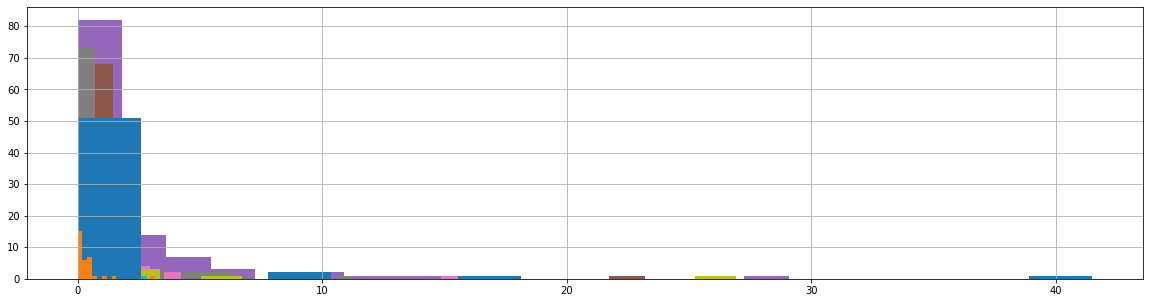

In [69]:
df[df['Publisher'] == 'Nintendo'].groupby('Genre')['NA_Sales'].hist(bins=16)

In [70]:
df[df['Publisher'] == 'Nintendo'].groupby('Genre')['NA_Sales'].value_counts()


Genre     NA_Sales
Action    0.00        18
          0.20         3
          0.04         2
          0.10         2
          0.16         2
                      ..
Strategy  0.50         1
          0.78         1
          1.02         1
          1.49         1
          3.18         1
Name: NA_Sales, Length: 465, dtype: int64

### Example of `agg` Method

Walk through the below example to see how to use the [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) method in Pandas. For more information, check out this [Tutorialspoint on groupby and agg](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm)

### Difference between agg and apply

apply applies the function to each group (your Year). Your function returns 1, so you end up with 1 value for each of 3 groups.

agg aggregates each column (feature) for each group, so you end up with one value per column per group.

In [176]:
# import the pandas library
import pandas as pd
import numpy as np

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
team_df = pd.DataFrame(ipl_data)

grouped = team_df.groupby('Year')
team_df.groupby('Year')['Points'].apply(np.mean)

#https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64

### What is the average number of sales by Genre for Publisher Nintendo

In [177]:
df[df['Publisher'] == 'Nintendo'].groupby('Genre')['NA_Sales'].apply(np.mean)

Genre
Action          0.803671
Adventure       0.506286
Fighting        1.505556
Misc            0.619800
Platform        1.965536
Puzzle          0.753243
Racing          1.987838
Role-Playing    0.996509
Shooter         1.976538
Simulation      1.024138
Sports          1.795818
Strategy        0.364375
Name: NA_Sales, dtype: float64

### What is the largest number of sales by Genre for Publisher Nintendo

In [88]:
df[df['Publisher'] == 'Nintendo'].groupby('Genre')['NA_Sales'].agg(np.max)

Genre
Action           4.40
Adventure        6.16
Fighting         6.75
Misc            14.03
Platform        29.08
Puzzle          23.20
Racing          15.85
Role-Playing    11.27
Shooter         26.93
Simulation       9.07
Sports          41.49
Strategy         3.18
Name: NA_Sales, dtype: float64

### Plot the sales in Japan vs sales in NA using seaborn

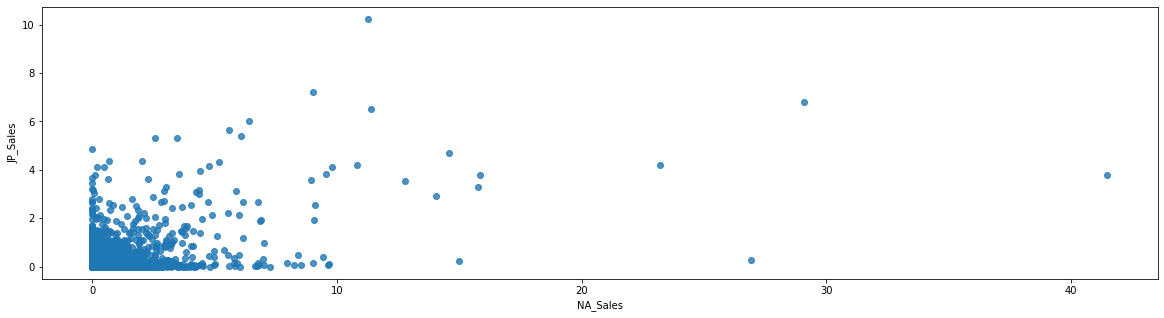

In [178]:
sns.regplot(x="NA_Sales", y="JP_Sales", fit_reg=False, data=df)

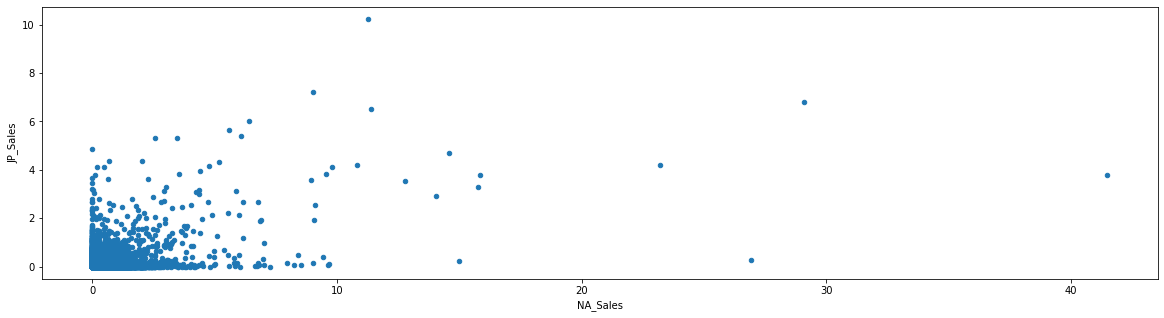

In [179]:
df.plot.scatter(x="NA_Sales", y="JP_Sales") #the same thing but with pandas built in plotting

### Plot sales by Genre for NA for years after 2010

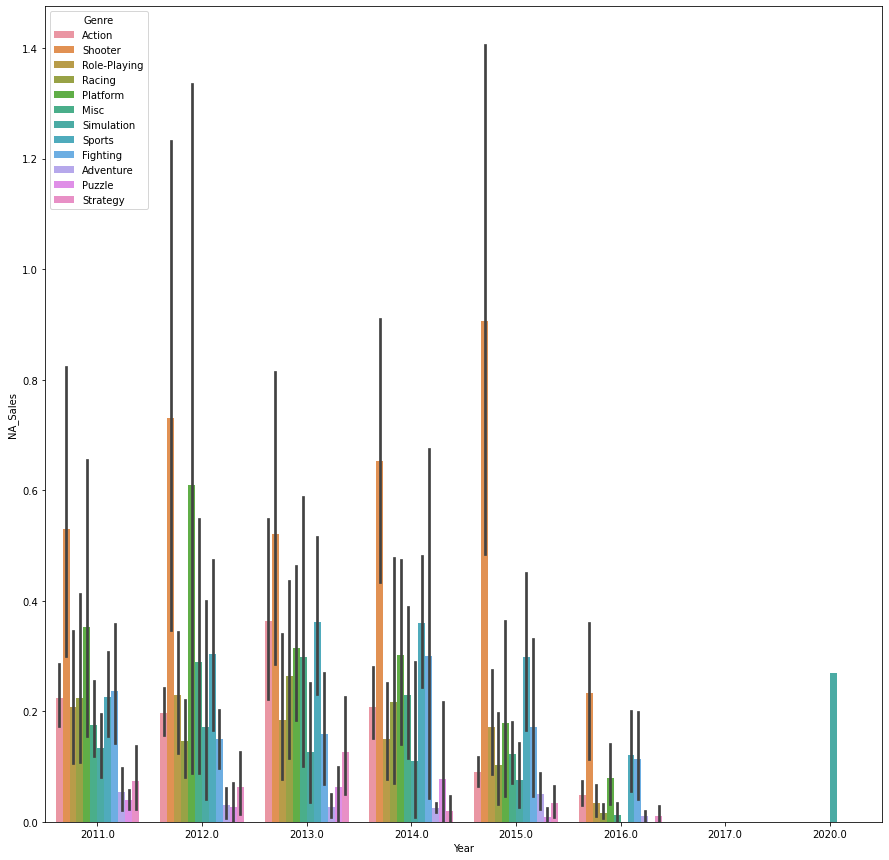

In [180]:
plt.rcParams['figure.figsize'] = [15, 15]
year_after_2010 = df[df["Year"] > 2010]
sns.barplot(x="Year", y="NA_Sales", hue="Genre", data=year_after_2010)#limit dataframe to smaller year range

### Count the number of genres for Wii and PS2

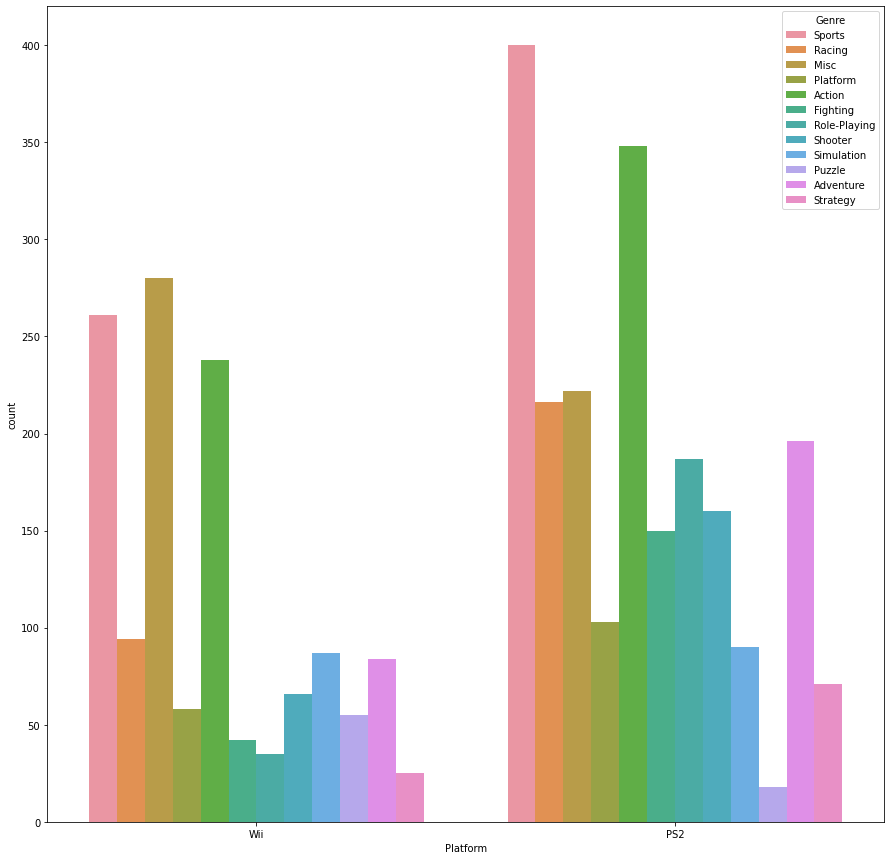

In [128]:
#To select rows whose column value is in an iterable, some_values, use isin:

#df[df["Platform"].isin(["Wii", "PS2"])]
sns.countplot(x="Platform", hue="Genre", data=df[df["Platform"].isin(["Wii", "PS2"])])

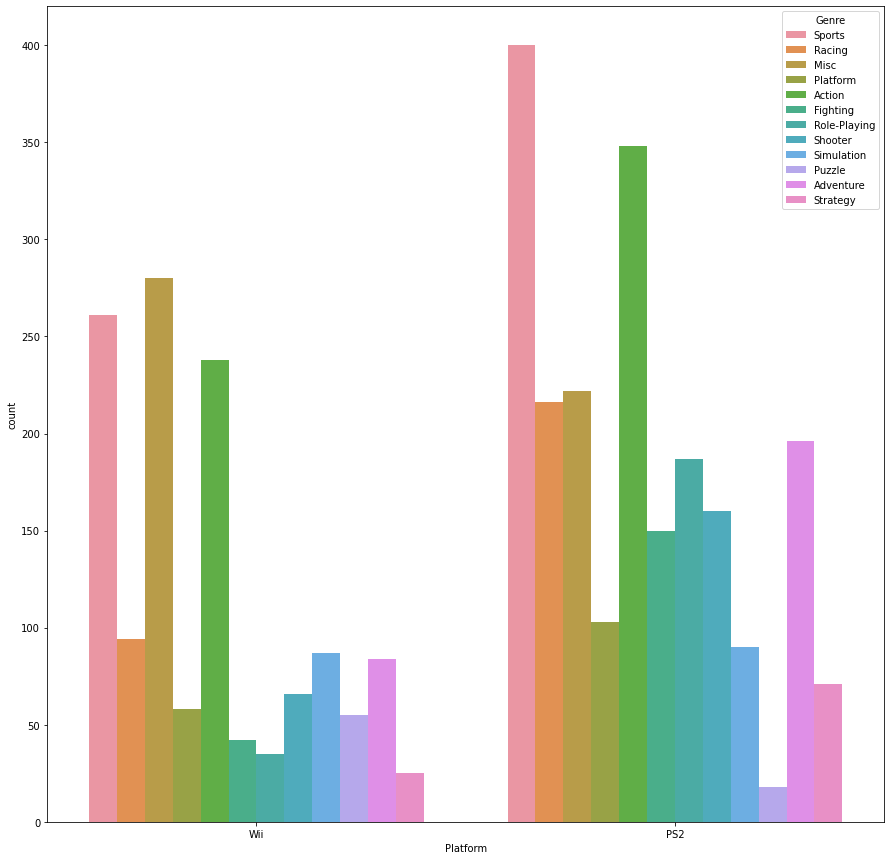

In [129]:
import seaborn as sns
sns.countplot(x="Platform", hue="Genre", data=df[df["Platform"].isin(["Wii", "PS2"])])

In [181]:
#Compute a simple cross tabulation of two (or more) factors. 
#By default computes a frequency table of the factors unless an array of values and an aggregation function are passed

pd.crosstab(df['Genre'], df['Platform'])

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,...,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,...,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,...,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,...,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,...,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,...,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,...,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,...,22,0,10,1,0,66,10,203,132,33


### Sometimes it is hard to read values from a plot. What are the number of female and male passengers at each Passenger Class?

In [135]:
pd.crosstab(df['Genre'], df['Platform'])

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,...,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,...,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,...,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,...,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,...,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,...,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,...,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,...,22,0,10,1,0,66,10,203,132,33


In [136]:
pd.crosstab(df['Genre'], df['Publisher'])

Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,4,0,17,0,21,5,0,0,...,1,0,1,0,0,0,0,0,1,0
Adventure,1,0,0,0,3,0,7,49,0,0,...,1,0,4,0,0,0,1,0,0,0
Fighting,0,0,0,0,1,0,11,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Misc,0,0,0,0,0,0,31,0,1,0,...,1,0,0,0,0,0,0,0,0,0
Platform,0,0,0,0,1,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Puzzle,1,0,0,1,1,0,15,0,1,0,...,2,0,0,0,1,0,0,0,0,0
Racing,0,1,0,0,0,0,2,0,0,0,...,3,1,0,0,0,0,0,0,0,0
Role-Playing,0,1,0,0,1,0,10,1,0,0,...,1,0,0,0,0,0,1,1,0,0
Shooter,0,0,1,0,5,0,18,3,0,0,...,2,0,0,0,0,1,0,0,0,0


## Stack plots

Shows all the data but each part makes up the whole. 

The stack method turns column names into index values, and the unstack method turns index values into column names.

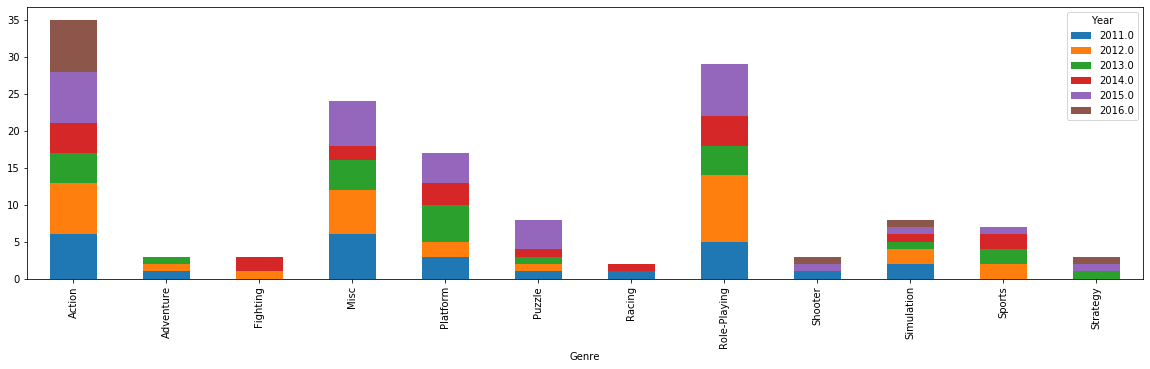

In [13]:
#filter to only show games published by Nintendo later than 2010
#Group by Genre
#Look at the year column for each of those groups
#get the value counts of each game release year

# df[(df['Publisher'] == 'Nintendo') & (df['Year'] > 2010)].groupby('Genre')['Year'].value_counts().unstack().plot(kind='bar',stacked=True)
df[(df['Publisher'] == 'Nintendo') & (df['Year'] > 2010)].groupby('Genre')['Year'].value_counts().unstack().plot(kind='bar', stacked=True)

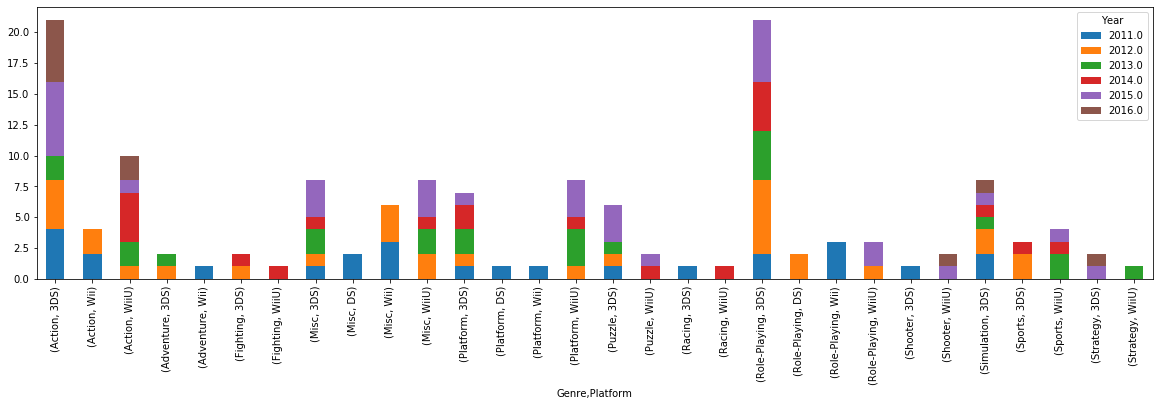

In [14]:
#Stack plots grouping ny genre and platforms within nintendo games after 2010

df[(df['Publisher'] == 'Nintendo') & (df['Year'] > 2010)].groupby(['Genre', 'Platform'])['Year'].value_counts().unstack().plot(kind='bar',stacked=True)

## Heatmaps

[A heatmap](https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/#:~:text=A%20heatmap%20is%20a%20two,Annotated%20Heatmap) is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

crosstab(): Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

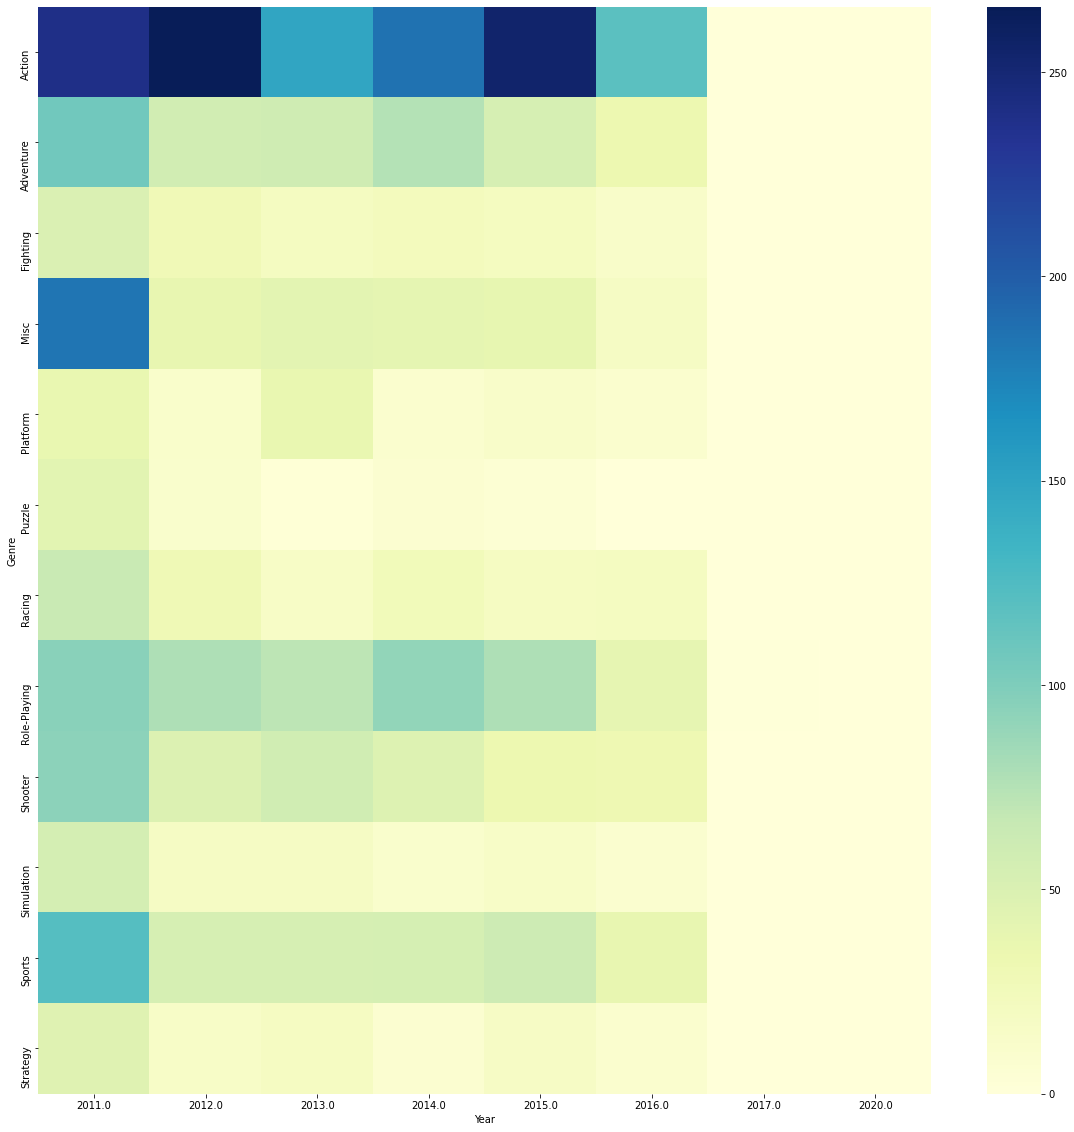

In [82]:
import seaborn as sns
#The mapping from data values to color space. If not provided, the default will depend on whether center is set.


#pd.crosstab(df["Genre"], df["Year"])
df_year_after_2010 = df[df['Year'] > 2010]
sns.heatmap(pd.crosstab(df_year_after_2010["Genre"], df_year_after_2010["Year"]), cmap="YlGnBu")

## Pivot Tables

A pivot table is a table of statistics that summarizes the data of a more complex table. This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way.

In [39]:
pd.pivot_table(df, index=["Year"])

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales,Rank
Year,,,,,,
1980.0,0.074444,1.264444,0.000000,1.176667,0.013333,3314.000000
1981.0,0.042609,0.777609,0.000000,0.726087,0.006957,4141.043478
1982.0,0.045833,0.801667,0.000000,0.747778,0.008611,4144.055556
1983.0,0.047059,0.987647,0.476471,0.456471,0.008235,3338.764706
1984.0,0.150000,3.597143,1.019286,2.377143,0.050000,1636.500000
1985.0,0.338571,3.852857,1.040000,2.409286,0.065714,3964.642857
1986.0,0.135238,1.765238,0.943333,0.595238,0.091905,1713.619048
1987.0,0.088125,1.358750,0.726875,0.528750,0.012500,3418.812500
1988.0,0.439333,3.148000,1.050667,1.591333,0.066000,2478.733333


## Challenge Problems

download the chocolate [bar dataset](https://www.kaggle.com/rtatman/chocolate-bar-ratings) and create graphs to help answer these questions:

1.For chocolate bars in U.S.A what cocoa percentage results in the highest ratings?
1. What cocoa percentage is most frequently used worldwide?
1. Come up with your own question!

In [67]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("Datasets/chocolate_bars.csv")
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


1.For chocolate bars in U.S.A what cocoa percentage results in the highest ratings?

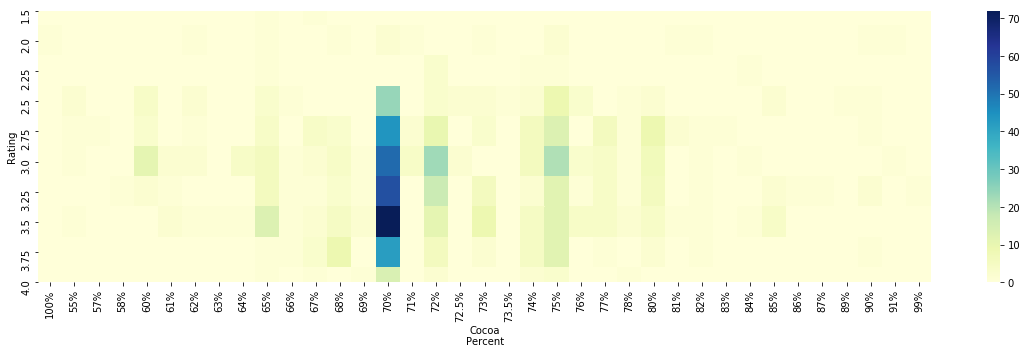

In [71]:
# pd.set_option('display.max_rows', None)
# df["Company\nLocation"]
us_df = df[df["Company\nLocation"] == "U.S.A."]
sns.heatmap(pd.crosstab(us_df["Rating"], us_df["Cocoa\nPercent"]), cmap="YlGnBu")

2.What cocoa percentage is most frequently used worldwide?

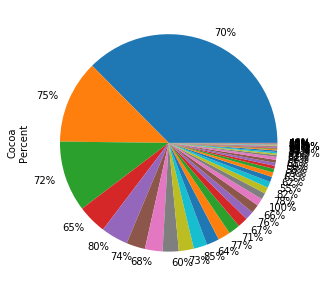

In [73]:
plt.rcParams['figure.figsize'] = [20, 5]
df["Cocoa\nPercent"].value_counts().plot(kind='pie')

CYOQ:

## Midterm Project

Project instructions can be found [here](https://docs.google.com/document/d/11v_d1bkFbTM4N3WU6JAbdR_9_eUChrN32-mdQ9zKaOw/preview)